average-car-price-b.webp
In this post I'm going to run through a function in Python that can quickly predict the Price of the car.

I have performed Linear Regression and Lasso Regression modles on the test and train data. According to plots, Lasso model is the best fit for the given dataset which can predict the car price accurately.

Let's get into it!

Importing Dependencies

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Data Processing

In [28]:
car_data = pd.read_csv('/content/drive/MyDrive/datasets/car data.csv')

In [29]:
car_data.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [30]:
car_data.shape

(301, 9)

Dataset Info

In [31]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking for Null and Missing Values

In [32]:
car_data.isnull()

Car_Name   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Seller_Type  Transmission  Owner  
0          False         False  False  
1          False         False  False  
2          False         False  False  
3          False         False  False  
4          False         False  False  
..           ...           ...    ...  
296        False         False  False  
297        False         False  False  
298        False         False  False  
299        False         False  False  
300        False         False  False  

[301 rows x 9 columns]

In [33]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [34]:
car_data.size

2709

In [35]:
car_data.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

Distribution of categorical data

In [40]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding Categorical Data

In [41]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace= True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [42]:
car_data

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0             0      0  
2              0             0      0  
3              0             0      0  
4              0             0      0  
..           ...           ...    ...  
296            0             0      0  
297            0             0      0  
298            0             0      0  
299            0             0      0  
300            0             0      0  

[301 rows x 9 columns]

Splitting the data into Training Data and Testing Data

In [46]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state= 2)

**1. Linear_Regression Model**

In [49]:
linear_regression = LinearRegression()

In [64]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

Predicting the training data

In [53]:
training_data_prediction = linear_regression.predict(X_train)

R Sqaurred Error

In [54]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.8799451660493711


In [55]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Vs Predicted')
plt.show()

Predicting the Testing Data

In [61]:
test_data_prediction = linear_regression.predict(X_test)

In [62]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8365766715027051


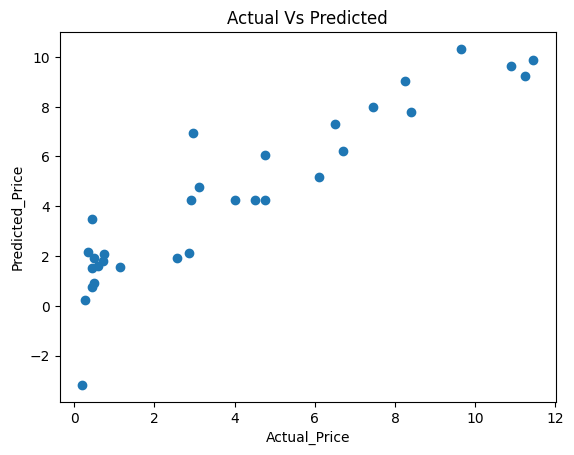

In [63]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Vs Predicted')
plt.show()

**2.Lasso_Regression Model**

In [65]:
lasso_regression = Lasso()

In [66]:
lasso_regression.fit(X_train,Y_train)

Lasso()

Predicting the training data

In [69]:
training_data_prediction = lasso_regression.predict(X_train)

R Sqaurred Error

In [70]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.8427856123435794


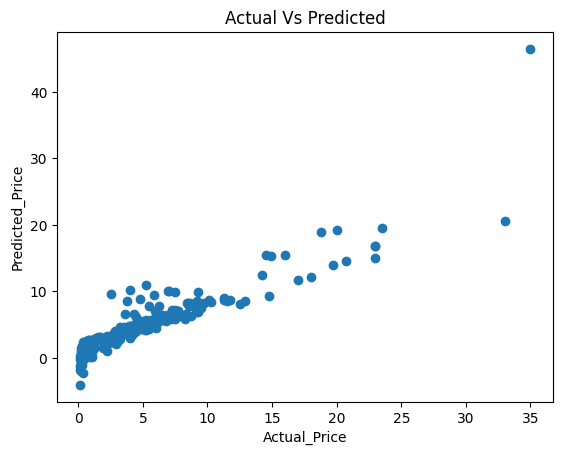

In [71]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Vs Predicted')
plt.show()

Predicting the Testing Data

In [72]:
test_data_prediction = lasso_regression.predict(X_test)

In [73]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8709167941173195


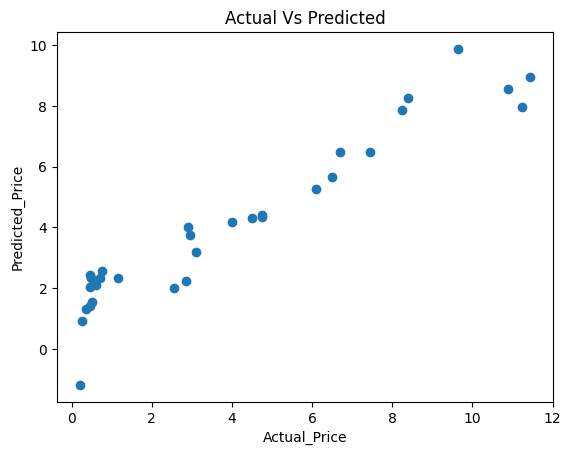

In [74]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Vs Predicted')
plt.show()